# Assignment 5: Neuroevolution

**Goal**: Implement an Evolutionary Algorithm to optimize an Artificial Neural Network (ANN) based controller for the CartPole task in OpenAI Gym environment.

CartPole evaluation environment functions are provided. Your goal is to implement your ANN to control the cartpole and use your Evolutionary Algorithm to optimize the ANN parameters (weights).

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

In [27]:
%pip install pyppeteer

import pyppeteer

Note: you may need to restart the kernel to use updated packages.


**Install Prerequisites**

In [5]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install moviepy

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install gymnasium[classic-control]

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install PyQt5
# or
%pip install PySide2


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Imports**

In [9]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# # Enables inline matplotib graphs
# %matplotlib inline
# # Comment the line above and uncomment the lines below to have interactive plots
# # # WARN: may cause dependency issues
%matplotlib inline
import matplotlib.pyplot as plt

# %matplotlib qt5
%pip install PyQt5
plt.ion()

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install gymnasium
import gymnasium as gym

Note: you may need to restart the kernel to use updated packages.


---
**Question 1 (0-0.25-0.5 pt):** Following link provides more information about the CartPole environemnt we would like to find an ANN to control: https://www.gymlibrary.dev/environments/classic_control/cart_pole/

Please have a look at the link and note the observation and action spaces, how many dimensions they have? Are they continous or discrete, and what kinds of value they can get?

**Answer:** 

Observation Space:
- Dimension: 4
- Type: Continuous
- Values:
  - Cart Position:  [-4.8, 4.8]
  - Cart Velocity:  (-Inf, +Inf)
  - Pole Angle: [-0.418 rad (-24°), 0.418 rad (24°)]
  - Pole Angular Velocity: (-Inf, +Inf)

Action Space:
- Dimension: 1
- Type: Discrete
- Values:
  - Push cart to the left (0)
  - Push cart to the right (1)



---
**Question 2 (0-0.25-0.5 pt):** What is your proposed ANN architecture and why? Please also discuss the activation functions you choose.

**Answer:** 

The proposed ANN architecture for the CartPole environment has an input layer with four neurons (because the CartPole environment provides observations with 4 features), a hidden layer with eight neurons (enough for relatively simpler problems, increase for more complicated problems), and an output layer with two neurons (move left or right). This design is selected to successfuly deal with the observations (inputs) while balancing computational efficiency. The hidden layer has an activation- the hyperbolic tangent (tanh) activation function. This was added to transform the input information into a suitable format for predicting actions. In addition, this helps to capture nonlinear relationships and prevent vanishing gradients. Moreover, the output layer has the softmax activation function to generate a probability distribution over possible actions. This activation is ensuring valid action probabilities. 

---
**Task 1: Implementation of Evolutionary Algrotihm (0-1.6-3.8-4.2-5 pt):** Implement your evolutionary algorithm to find an ANN controller for the CartPole task.

In [12]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 1.6 pts if the code works but some functions are incorrect and it is badly explained
# 3.8 pts if the code works but some functions are incorrect but it is explained well
# 4.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 5 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


# Artificial Neural Network parameters (weights)
# See here: https://www.gymlibrary.dev/environments/classic_control/cart_pole/ for input and output space
# PLEASE SPECIFY BELOW

#the input is 4 as mentioned in Q2
inp = 4 # Number of input neurons
#the hidden layer count is 8, which enough for not as complicated problems
hid = 8 # Number of hidden neurons
#the output is 4 as mentioned in Q2
out = 2 # Nubmer of output neurons
###################


#Open AI gym environment
env = gym.make("CartPole-v1")

# CartPole evaluation function
def cartpole(x):

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs

    #here we extract weights that are connecting input neurons to hidden neurons
    input_hidden_w = x[:inp * hid].reshape(inp, hid)
    #here we extract weights that are connecting hidden neurons to output neurons
    output_hidden_w = x[inp * hid:].reshape(hid, out)
    #########

    # Reset environment
    observation, info = env.reset(seed = 0)

    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000:

      ###################
      # PLEASE FILL IN
      # Hint: Provide input to ANN and find the output to be the action
      # action = ?

      #the activation for hidden layer is done by multiplying the input observation by the input to hidden layer weights
      hidden_activations = np.dot(observation, input_hidden_w)
      #then apply the hyperbolic tangent activation function to the hidden layer activations
      hidden_activations = np.tanh(hidden_activations) 
      #the activations for output layer is done by multiplying the hidden layer activations by the hidden to output layer weights    
      output_activations = np.dot(hidden_activations, output_hidden_w)
      #the output probabilities are calculated by applying the softmax acivation function for the output layer activations
      output_probs = np.exp(output_activations) / np.sum(np.exp(output_activations))
      #choose an action based on the output probabilities
      action = np.random.choice(range(out), p=output_probs)

      # action should be provided based on the output of the artifial neural network
      observation, reward, done, tr, info = env.step(action)
      step+=1 # step counter
      rew = rew + reward # after each step increment reward

    env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)



# CartPole evaluation function with video recording
def cartpole_record_video(x):
    tmp_env = gym.make("CartPole-v1", render_mode="rgb_array")

    # Video recording function - be sure to check the folder path - you should see the video here:content/video/cartpole
    env = gym.wrappers.RecordVideo(env=tmp_env, video_folder="content/video/cartpole", name_prefix="cartpole")

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs

    #here we extract weights that are connecting input neurons to hidden neurons
    input_hidden_w = x[:inp * hid].reshape(inp, hid)
    #here we extract weights that are connecting hidden neurons to output neurons
    output_hidden_w = x[inp * hid:].reshape(hid, out)

    #########
    
    # Reset environment
    observation, info = env.reset(seed = 0)

    env.start_video_recorder()

    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000: # run nStep number of time

      ###################
      # PLEASE FILL IN
      # Hint: Provide input to ANN and find the output to be the action
      # action = ?
      #the activation for hidden layer is done by multiplying the input observation by the input to hidden layer weights
      hidden_activations = np.dot(observation, input_hidden_w)
      #then apply the hyperbolic tangent activation function to the hidden layer activations
      hidden_activations = np.tanh(hidden_activations) 
      #the activations for output layer is done by multiplying the hidden layer activations by the hidden to output layer weights    
      output_activations = np.dot(hidden_activations, output_hidden_w)
      #the output probabilities are calculated by applying the softmax acivation function for the output layer activations
      output_probs = np.exp(output_activations) / np.sum(np.exp(output_activations))
      #choose an action based on the output probabilities
      action = np.random.choice(range(out), p=output_probs)


      # action should be provided based on the output of the artifial neural network
      observation, reward, done, tr, info = env.step(action)
      step+=1 # step counter
      rew = rew + reward # after each step increment reward
      env.render()

    env.close_video_recorder()
    env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)




# CartPole evaluation function for visualizing the cartpole environment
def cartpole_visualize(x):
    tmp_env = gym.make("CartPole-v1", render_mode="human")

    ###########
    # PLEASE FILL IN
    # Hint: x is an individual in evolutionary algorithms and needs to map to the connection weights of ANNs
    input_hidden_w = x[:inp * hid].reshape(inp, hid)
    output_hidden_w = x[inp * hid:].reshape(hid, out)
    #########

    # Reset environment
    observation, info = tmp_env.reset(seed = 0)

    rew = 0 # Initial reward
    step = 0; #step counter
    done = False
    maxStep = 1000  # maximum number of steps
    while not done and step<1000: # run nStep number of time

      ###################
      # PLEASE FILL IN
      # Hint: Provide input to ANN and find the output to be the action
      # action = ?
        #the activation for hidden layer is done by multiplying the input observation by the input to hidden layer weights
        hidden_activations = np.dot(observation, input_hidden_w)
        #then apply the hyperbolic tangent activation function to the hidden layer activations
        hidden_activations = np.tanh(hidden_activations) 
        #the activations for output layer is done by multiplying the hidden layer activations by the hidden to output layer weights    
        output_activations = np.dot(hidden_activations, output_hidden_w)
        #the output probabilities are calculated by applying the softmax acivation function for the output layer activations
        output_probs = np.exp(output_activations) / np.sum(np.exp(output_activations))
        #choose an action based on the output probabilities
        action = np.random.choice(range(out), p=output_probs)

      # action should be provided based on the output of the artifial neural network
        observation, reward, done, tr, info = tmp_env.step(action)
        step+=1 # step counter
        rew = rew + reward # after each step increment reward
        tmp_env.render()

    tmp_env.close()
    return np.minimum(maxStep, rew) # return the reward or maxStep (if maxStep < 1000, this means that pole fell)



# Implement your Evolutionary Algorithm to find the ANN weigths that can balance the CartPole
# Feel free to add any functions, such as initialization, crossover, etc.. to make it work!

#*the most part of the code is taken from assignment 2
def initialization(population_size):
    #create an empty list to store the population
    x = []
    for _ in range(population_size):
        #random array with values up to the sum of the weights connecting input to hidden layer and hidden to output layer
        x.append(np.random.rand(inp * hid + hid * out))
    #convert to an array
    x = np.array(x)
    return x

def evaluation(x, objective_function):
    fitness = []
    #evaluate each individual of x by applying the objective function
    for individual in x:
        f_value = objective_function(individual)
        fitness.append(f_value)

    #convert the list to array
    fitness = np.array(fitness)
    return fitness  

def crossover(x_parents, p_crossover):
    number_parents, number_dim = x_parents.shape
    number_ofsprings = number_parents - 1

    #greate an array with zeros where to store the offspring values
    offspring = np.zeros((number_ofsprings+1, number_dim))

    #iterate through every 2 valus
    for i in range(0, number_ofsprings, 2):
        parent = x_parents[i]
        parent2 = x_parents[i+1]

        #if a random value between 0 and 1 is smaller than the crossover, perform it
        if np.random.rand() < p_crossover:
            #select a random integer as a crossover point
            cross_over = np.random.randint(1, number_dim)
            #do one point crossover
            offspring[i] = np.concatenate((parent[:cross_over], parent2[cross_over:]))
            offspring[i+1] = np.concatenate((parent2[:cross_over], parent[cross_over:]))
        #do not do the crossover, so just select parents as offspring
        else:
            offspring[i] = parent
            offspring[i+1] = parent2

    return offspring


def mutate(x, m_rate):
    for i in range(len(x)):
        #perform mutation if a random value between 0 and 1 is less than the mutation rate
        if np.random.rand() < m_rate:
            #the mutation value is a random value from the normal distribution
            mutation_value = np.random.normal(0,1)
            #add the mutation value to each individual in the population
            x[i] += mutation_value
    return x


def parent_selection(x, f):
    #extract the population size
    population_size = len(x)
    #the population size is also the number of parents
    number_parents = population_size

    #create arrays of zeros to store selected parents and corresponding fitness values
    x_parents = np.zeros((number_parents, x.shape[1]))
    f_parents = np.zeros(number_parents)

    for i in range(number_parents):
        #randomly choose two different individuals
        idx1, idx2 = np.random.choice(population_size, size=2, replace=False)
        #compare the fitness values and select the individual with the highest fitness value
        if f[idx1] > f[idx2]:
            x_parents[i] = x[idx1]
            f_parents[i] = f[idx1]
        else:
            x_parents[i] = x[idx2]
            f_parents[i] = f[idx2]

    return x_parents, f_parents  



# Evolutionary Algorithm (EA) to find ANN weights that balance the CartPole
def ea(
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,  # Mutation rate
    objective_function,  # Objective function to be minimized
):
    #initialise population
    population = initialization(population_size)
    #initialize best solution and fitness
    x_best = None
    f_best = -np.inf

    #evaluate
    fitness_values = evaluation(population, objective_function)
    for x, fitness in zip(population, fitness_values):
        if fitness > f_best:
            x_best = x
            f_best = fitness

    for _ in range(max_fit_evals):
        #select parents
        parents, fitness_parents = parent_selection(population, fitness_values) 

        #do crossover
        offspring = crossover(parents, p_crossover)

        #do mutation
        offspring = mutate(offspring, m_rate)

        #evaluate offspring and replace worst individuals
        offspring_fitness = evaluation(offspring, objective_function)
        for i in range(len(population)):
            if offspring_fitness[i] > fitness_values[i]:
                population[i] = offspring[i]
                fitness_values[i] = offspring_fitness[i]
                if offspring_fitness[i] > f_best:
                    x_best = offspring[i]
                    f_best = offspring_fitness[i]


    return x_best, f_best  # return the best solution (ANN weights) and the fitness

#### Check Your Implementation: Running The Evolutionary Algorithm

Run the cell below, if you implemented everything correctly, you should see the algorithm running. Furthermore,

In [13]:
# Dummy parameters, please add or remove based on your implementation
kwargs = {
    "population_size": 20,
    "max_fit_evals": 100,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.5,  # mutation rate
    "objective_function": cartpole,
}
# Run your algorithm once and find the best ANN weigths found
env = gym.make("CartPole-v1")
x_best, f_best = ea(**kwargs)


# Print the best ANN weigths found and best fitness
print("Best ANN parameters found:",x_best)
print("Best fitnes found:",f_best)


# Evaluate your ANN weights again and record the video
if f_best >= 1000:
  cartpole_record_video(x_best)
  #or cartpole_visualize(x_best[-1] )
else:
  print("The best fitness 1000 was not found, try again!!")

Best ANN parameters found: [-0.58880729  0.13887328  0.09441959  0.09642485 -0.37221598  1.19289754
  2.60104632  4.05691069  4.00730087  3.69779152  4.57119019  4.55768335
  3.96893734  4.0433789   4.11535313  4.29562409  4.33102     4.34581111
  4.45673443  4.02201834  3.79534778  4.45250277  3.74484879  4.07909414
  4.09874314  3.88363223  4.66053005  4.27176343  4.28555333  4.10767744
  4.36443433  3.87522701  3.67704038  5.05514354  4.64029734  5.30144279
  4.68319479  5.23378018  4.77248174  5.14554761  4.66054662  5.17348742
  5.16062057  4.77024475  4.65316954  5.44134103  5.54146944  4.80857376]
Best fitnes found: 1000.0
Moviepy - Building video c:\Users\Private\Documents\uni\year2\CI\assignment5\content\video\cartpole\cartpole-episode-0.mp4.
Moviepy - Writing video c:\Users\Private\Documents\uni\year2\CI\assignment5\content\video\cartpole\cartpole-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\Private\Documents\uni\year2\CI\assignment5\content\video\cartpole\cartpole-episode-0.mp4


Moviepy - Building video c:\Users\Private\Documents\uni\year2\CI\assignment5\content\video\cartpole\cartpole-episode-0.mp4.
Moviepy - Writing video c:\Users\Private\Documents\uni\year2\CI\assignment5\content\video\cartpole\cartpole-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\Private\Documents\uni\year2\CI\assignment5\content\video\cartpole\cartpole-episode-0.mp4


---
**Question 3 (0-0.25-0.5 pt):** Please comment on the behavior of the final solution. Were you able to find the best solution (i.e. ANN weights which achieves best fitness: 1000) and was it possible to controll the CartPole task without letting the the pole fall?

**Answer:** 
The final solution successfully found the best set of ANN weights that achieved a fitness score of 1000. This fitness value is optimal and sufficient based on the specified fitness function. The evolutionary algorithm was able to find optimal values for successful CartPole task execution. Based on the video, the CartPole task was indeed controlled successfully without letting the pole fall for the entire duration of the evaluation period.


**Average results of your algorithm**

Remember that the EAs are sthocastic algorithms that can produce different results as a result of independent runs.

Therefore, we would like to see the average results and standard deviations.


---
**Task 2 (0-1.5-3 pt):** Please run your algorithm for at least 10 times and plot the average results and standard deviations. Below, you may add as many cells as you need for this implementation and plot functions. You may use previous code you have developed/used during the course.

In [14]:
def calculate_mean_std(data):
    """Helper function to calculate mean and standard deviation."""
    data_array = np.array(data)
    return np.mean(data_array), np.std(data_array)

def run_cartpole_experiment():
    #lists for the best fitness values for each run
    cartpole_results = []

    #number of runs is 10
    for i in range(10):
        print(f"Running iteration {i+1}")
        #parameters for running
        kwargs = {
            "population_size": 20,
            "max_fit_evals": 100,
            "p_crossover": 0.9,
            "m_rate": 0.5,
            "objective_function": cartpole,
        }
        env = gym.make("CartPole-v1")
        #run the evolutionary algorithm to get the best fitness
        x_best, f_best = ea(**kwargs)
        cartpole_results.append(f_best)
        print("Best fitness found this run:", f_best)

    #calculate the avg and std values
    cartpole_avg, cartpole_std = calculate_mean_std(cartpole_results)

    avgs = [cartpole_avg]
    stds = [cartpole_std]
    all_runs = [cartpole_results]

    return avgs, stds, all_runs


averages, standard_deviations, all_runs_data = run_cartpole_experiment()
print("Averages:", averages)
print("Standard Deviations:", standard_deviations)
print("All runs data:", all_runs_data)



Running iteration 1
Best fitness found this run: 1000.0
Running iteration 2
Best fitness found this run: 1000.0
Running iteration 3
Best fitness found this run: 1000.0
Running iteration 4
Best fitness found this run: 1000.0
Running iteration 5
Best fitness found this run: 1000.0
Running iteration 6
Best fitness found this run: 1000.0
Running iteration 7
Best fitness found this run: 1000.0
Running iteration 8
Best fitness found this run: 1000.0
Running iteration 9
Best fitness found this run: 1000.0
Running iteration 10
Best fitness found this run: 1000.0
Averages: [1000.0]
Standard Deviations: [0.0]
All runs data: [[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]]


[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]


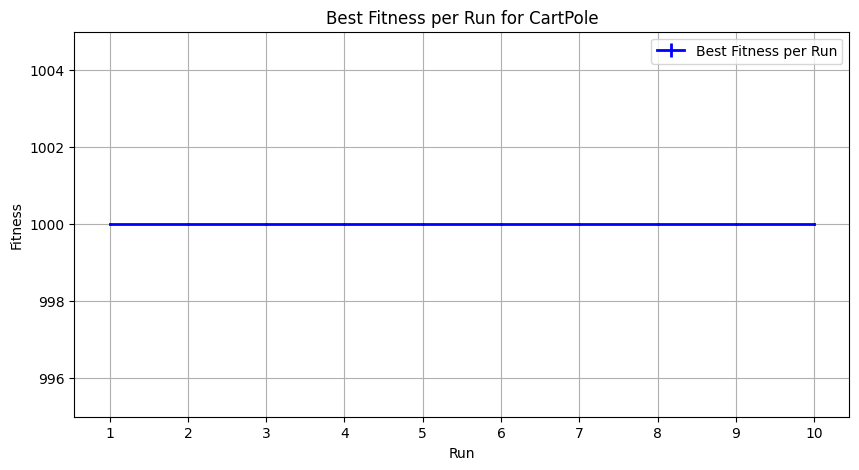

In [25]:


def plot_fitness_per_run(averages, standard_deviations, all_runs_data):
    plt.figure(figsize=(10, 5))
    #the fitness values got in all runs
    fitness_values = all_runs_data[0] 
    print(fitness_values)
    #number of runs
    runs = np.arange(1, len(fitness_values) + 1)
   
    #plot the fitness values and stds (the stds are zero, so no changes visible from the fitness values)
    plt.errorbar(runs, fitness_values, yerr=standard_deviations, fmt='o-', label='Best Fitness per Run', color='blue', markersize=1, linewidth=2)

    #for plotting
    plt.title("Best Fitness per Run for CartPole")
    plt.xlabel("Run")
    plt.ylabel("Fitness")
    plt.ylim(min(fitness_values) - 5, max(fitness_values) + 5)  
    plt.xticks(runs) 
    plt.grid(True)
    plt.legend()
    plt.show()

#run with the values of the 10 runs 
plot_fitness_per_run(averages, standard_deviations, all_runs_data)

---
**Question 4 (0-0.25-0.5 pt):** Please comment on the average behavior of your algorithm. How did the average results and standard deviations look? Did your algorithm converge all the time to the best fitness?

**Answer:** 
The algorithm consistently achieved optimal performance by converging to the best possible fitness score of 1000 across all iterations. Each run demonstrated identical results of 1000, with no variance in the best fitness score and so the standard deviation was 0. This value is indicating stable behavior of results. The ea algorithm has a balance between exploration and exploitation which is acheived by such components as crossover, mutation, and parent selection together with appropriate hyperparameters. This algorithm was able to search and evaluate the space enough to find the optimal solution for the CartPole task without having any fluctuations or uncertainties. 